# a) Exploratory Data Analysis

###  Importing the required Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading data into DataFrame

In [39]:
data = pd.read_csv("Mess Timings Dataset - Sheet1.csv")
data.head()

,Date,Day,Category,Start,Duration,Holiday,Special dinner
0,19/9/23,Tuesday,Breakfast,08:20,19,no,no
1,19/9/23,Tuesday,Lunch,13:56,24,no,no
2,19/9/23,Tuesday,Tea,17:38,16,no,no
3,19/9/23,Tuesday,Dinner,19:57,25,no,no
4,20/9/23,Wednesday,Breakfast,08:32,21,no,yes


### Checking the Column Types

In [40]:
data.info() #checking the column types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            56 non-null     object
 1   Day             56 non-null     object
 2   Category        56 non-null     object
 3   Start           56 non-null     object
 4   Duration        56 non-null     int64 
 5   Holiday         56 non-null     object
 6   Special dinner  56 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.2+ KB


In [41]:
data.dtypes

Date              object
Day               object
Category          object
Start             object
Duration           int64
Holiday           object
Special dinner    object
dtype: object

###  Removing Irrevalent Columns

In [42]:
data.drop("Date",axis=1,inplace=True)
data.head() #removed the reference column

,Day,Category,Start,Duration,Holiday,Special dinner
0,Tuesday,Breakfast,08:20,19,no,no
1,Tuesday,Lunch,13:56,24,no,no
2,Tuesday,Tea,17:38,16,no,no
3,Tuesday,Dinner,19:57,25,no,no
4,Wednesday,Breakfast,08:32,21,no,yes


### Renaming columns for better indexing

In [43]:
data = data.rename(columns={"Special dinner": "Special_dinner"})
data.head()

,Day,Category,Start,Duration,Holiday,Special_dinner
0,Tuesday,Breakfast,08:20,19,no,no
1,Tuesday,Lunch,13:56,24,no,no
2,Tuesday,Tea,17:38,16,no,no
3,Tuesday,Dinner,19:57,25,no,no
4,Wednesday,Breakfast,08:32,21,no,yes


### Checking Duplicate rows

In [44]:
data[data.duplicated()] #no duplicates

,Day,Category,Start,Duration,Holiday,Special_dinner


### Checking for missing or null values

In [45]:
data.isnull().sum().sum() #along columns

0

In [46]:
data.isnull().sum(axis=1).sum() #along rows

0

### Plots

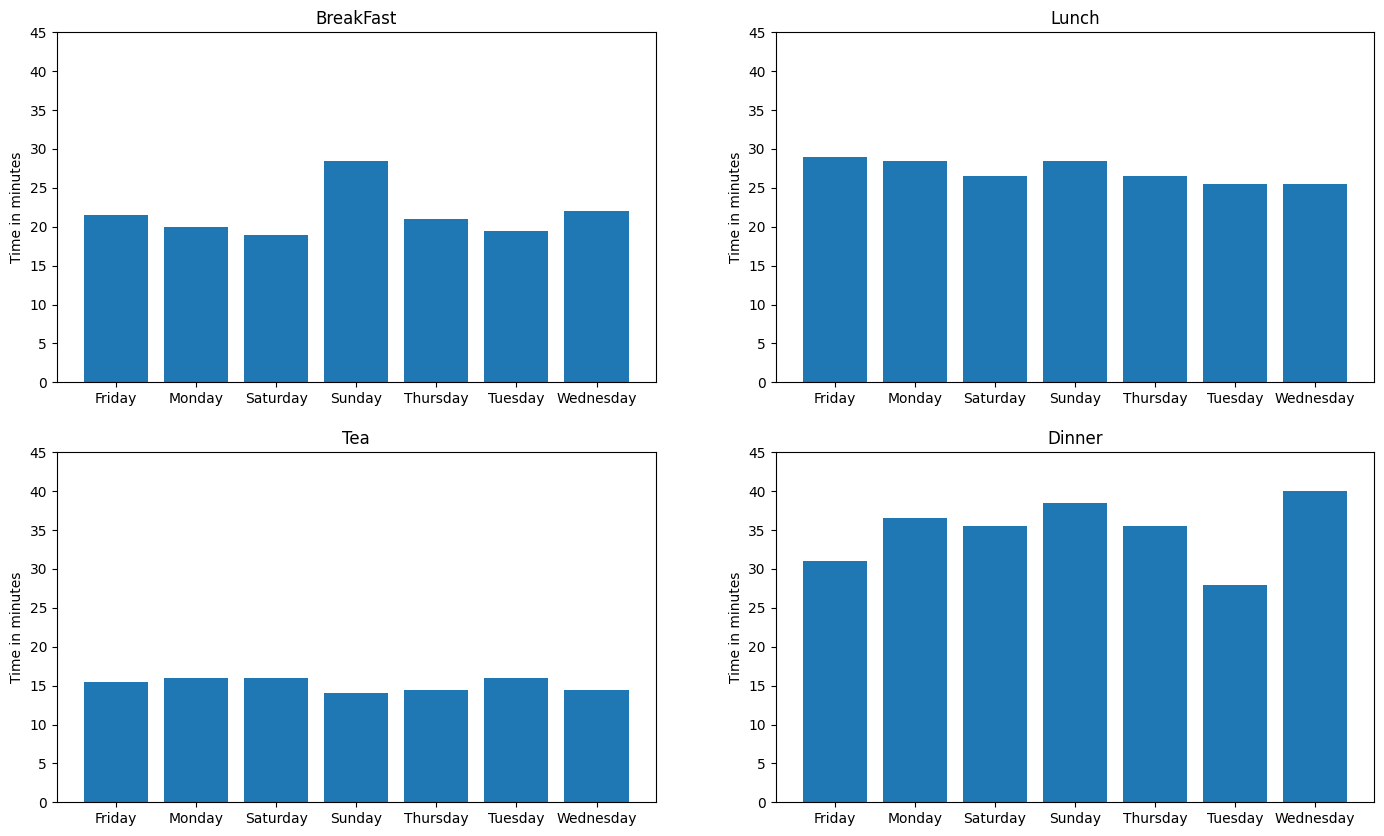

In [47]:
fig,ax = plt.subplots(nrows=2,ncols=2, figsize=(17,10))

ax[0,0].bar(data[data['Category'] == "Breakfast" ][["Duration","Day"]].groupby(["Day"]).mean().index,data[data['Category'] == "Breakfast" ][["Duration","Day"]].groupby(["Day"]).mean().Duration)
ax[0,0].set_ylim(0,45)
ax[0,0].set_title("BreakFast")
ax[0,0].set_ylabel("Time in minutes")

ax[0,1].bar(data[data['Category'] == "Lunch" ][["Duration","Day"]].groupby(["Day"]).mean().index,data[data['Category'] == "Lunch" ][["Duration","Day"]].groupby(["Day"]).mean().Duration)
ax[0,1].set_ylim(0,45)
ax[0,1].set_title("Lunch")
ax[0,1].set_ylabel("Time in minutes")

ax[1,0].bar(data[data['Category'] == "Tea" ][["Duration","Day"]].groupby(["Day"]).mean().index,data[data['Category'] == "Tea" ][["Duration","Day"]].groupby(["Day"]).mean().Duration)
ax[1,0].set_ylim(0,45)
ax[1,0].set_title("Tea")
ax[1,0].set_ylabel("Time in minutes")

ax[1,1].bar(data[data['Category'] == "Dinner" ][["Duration","Day"]].groupby(["Day"]).mean().index,data[data['Category'] == "Dinner" ][["Duration","Day"]].groupby(["Day"]).mean().Duration)
ax[1,1].set_ylim(0,45)
ax[1,1].set_title("Dinner")
ax[1,1].set_ylabel("Time in minutes")

plt.show()

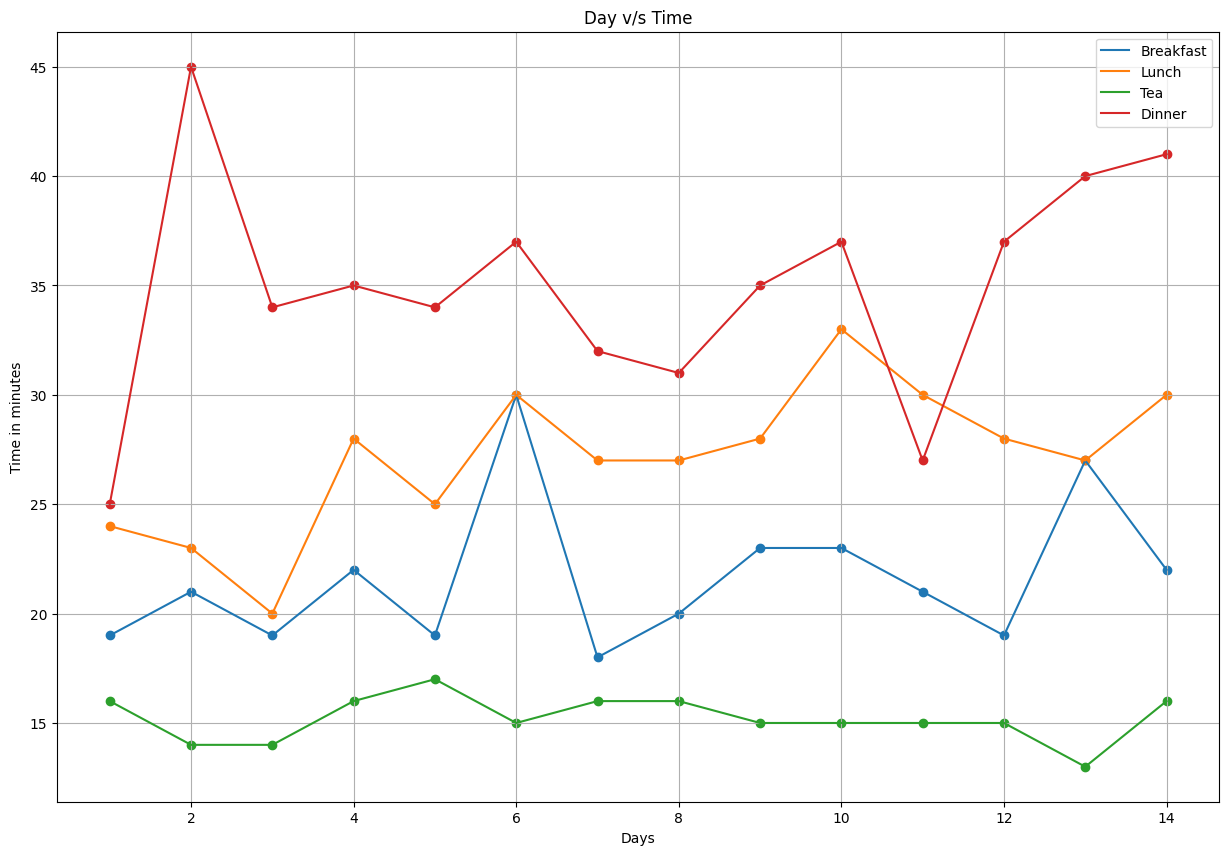

In [48]:
plt.figure(figsize=(15,10))
plt.plot(range(1,15),data[data["Category"] == "Breakfast"].Duration)
plt.plot(range(1,15),data[data["Category"] == "Lunch"].Duration)
plt.plot(range(1,15),data[data["Category"] == "Tea"].Duration)
plt.plot(range(1,15),data[data["Category"] == "Dinner"].Duration)
plt.scatter(range(1,15),data[data["Category"] == "Breakfast"].Duration)
plt.scatter(range(1,15),data[data["Category"] == "Lunch"].Duration)
plt.scatter(range(1,15),data[data["Category"] == "Tea"].Duration)
plt.scatter(range(1,15),data[data["Category"] == "Dinner"].Duration)
plt.legend(['Breakfast','Lunch','Tea','Dinner'])
plt.xlabel("Days")
plt.ylabel("Time in minutes")
plt.title("Day v/s Time")
plt.grid()
plt.show()

### Box Plot for Duration vs Category

Text(0.5, 1.0, 'Duration vs Category')

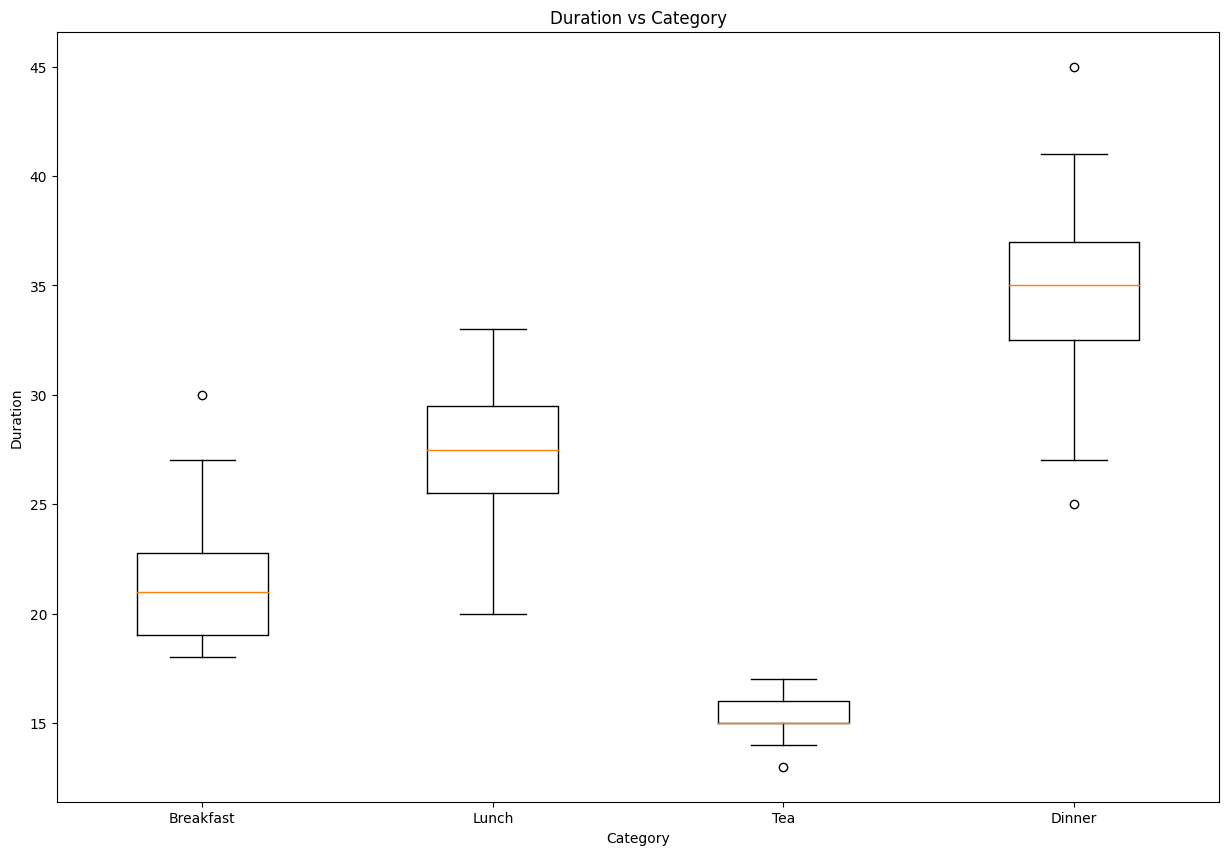

In [49]:
group_data=[data[data["Category"]==i].Duration.tolist() for i in data["Category"].drop_duplicates()]
plt.figure(figsize=(15,10))
plt.boxplot(group_data)
plt.xticks([1,2,3,4],['Breakfast','Lunch','Tea','Dinner'])
plt.xlabel("Category")
plt.ylabel("Duration")
plt.title("Duration vs Category")

### Box Plot for Day vs Duration

Text(0.5, 1.0, 'Day vs Category')

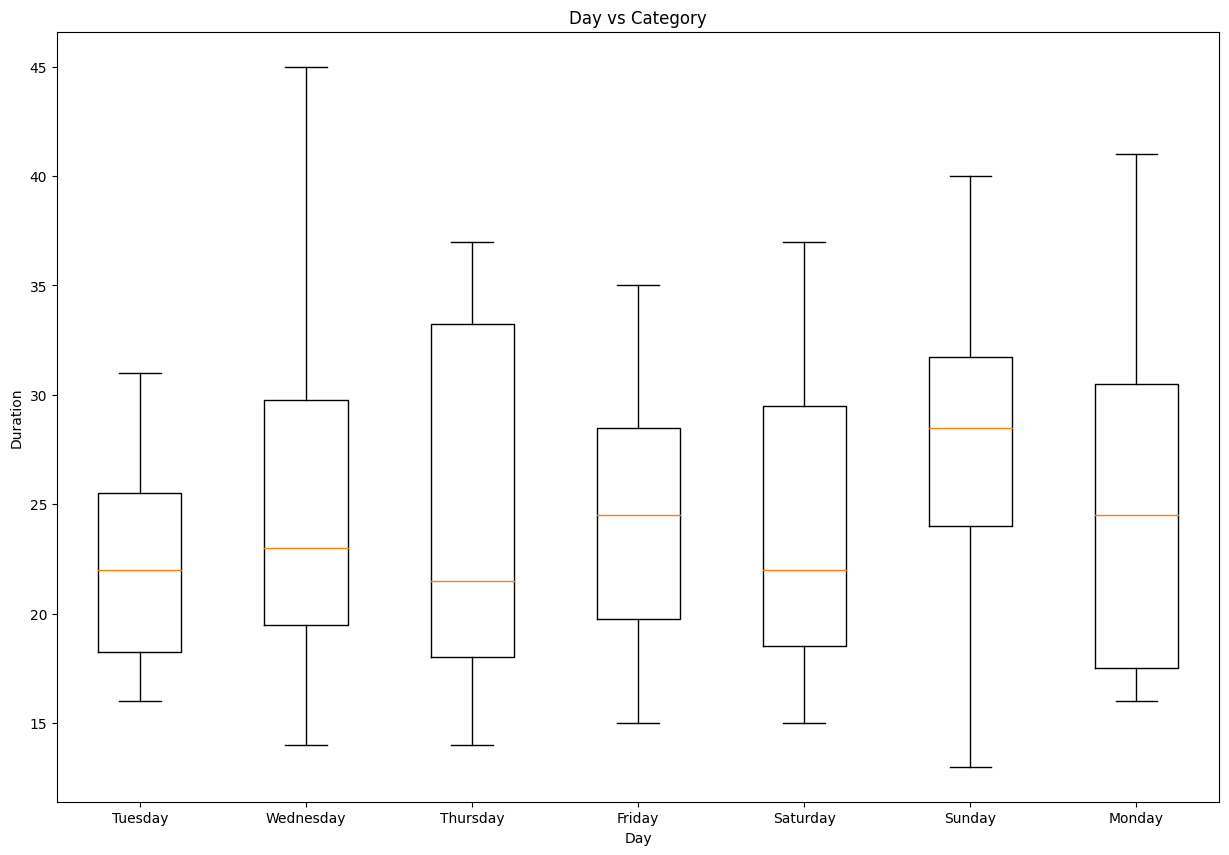

In [50]:
group_data=[data[data["Day"]==i].Duration.tolist() for i in data["Day"].drop_duplicates()]
plt.figure(figsize=(15,10))
plt.boxplot(group_data)
plt.xticks(range(1,8), data["Day"].drop_duplicates().tolist())
plt.xlabel("Day")
plt.ylabel("Duration")
plt.title("Day vs Category")

###  Scatter Plot for Start vs Duration

Text(0.5, 1.0, 'Start vs Category')

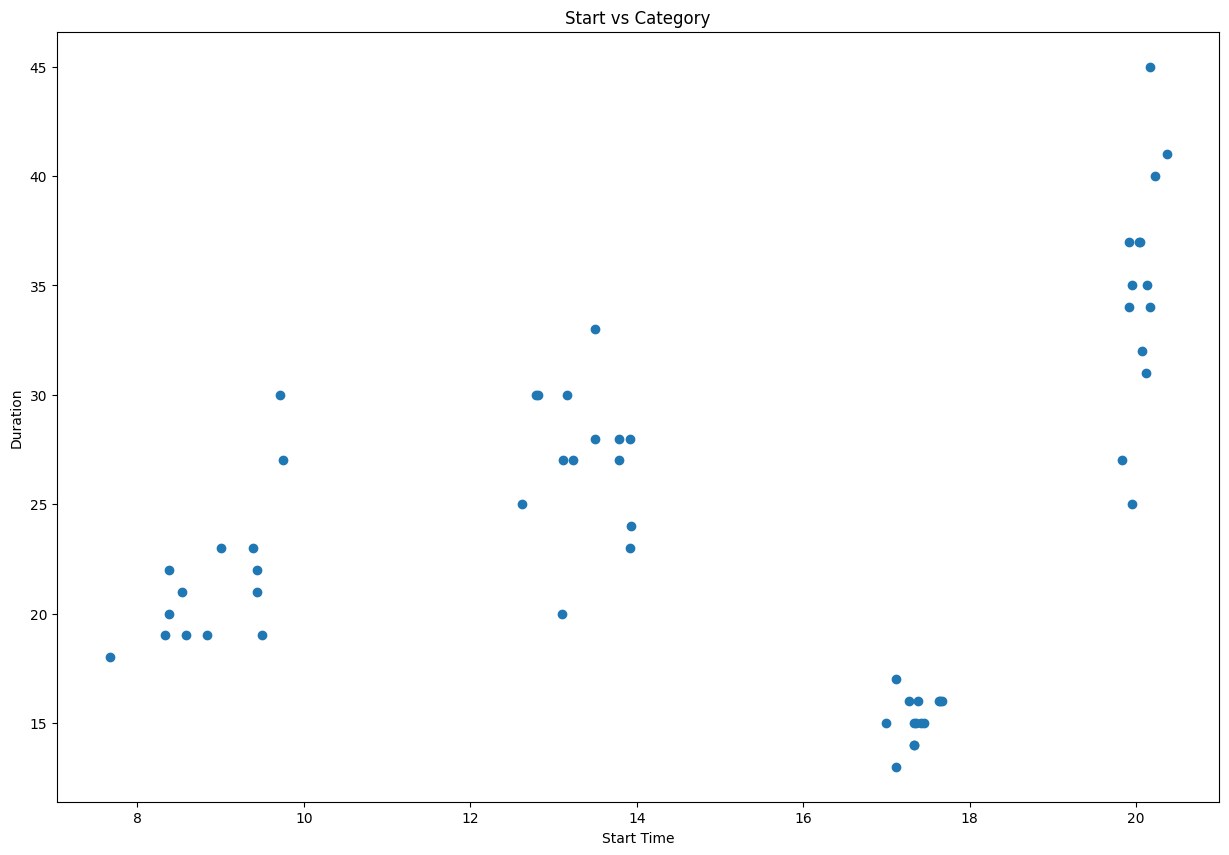

In [51]:
start= data["Start"].apply(lambda x: float(int(x[:2])+ int(x[3:])/60)).tolist()
plt.figure(figsize=(15,10))
plt.scatter(start,data["Duration"].tolist())
plt.xlabel("Start Time")
plt.ylabel("Duration")
plt.title("Start vs Category")

###  Box plot for Holiday vs Duration

Text(0.5, 1.0, 'Holiday vs Category')

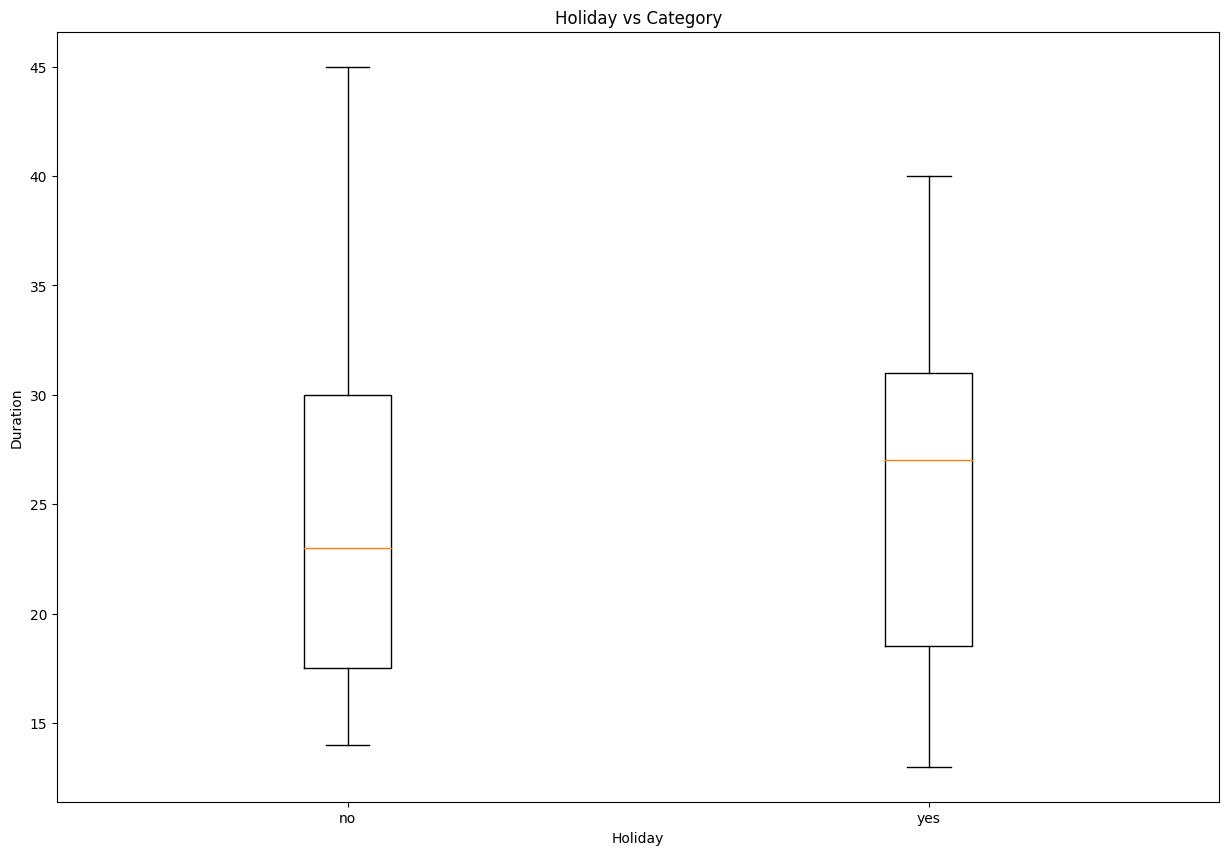

In [52]:
group_data=[data[data["Holiday"]==i].Duration.tolist() for i in data["Holiday"].drop_duplicates()]
plt.figure(figsize=(15,10))
plt.boxplot(group_data)
plt.xticks(range(1,3), data["Holiday"].drop_duplicates().tolist())
plt.xlabel("Holiday")
plt.ylabel("Duration")
plt.title("Holiday vs Category")

### Box Plot for Special_dinner vs Duration

Text(0.5, 1.0, 'Special Dinner vs Category')

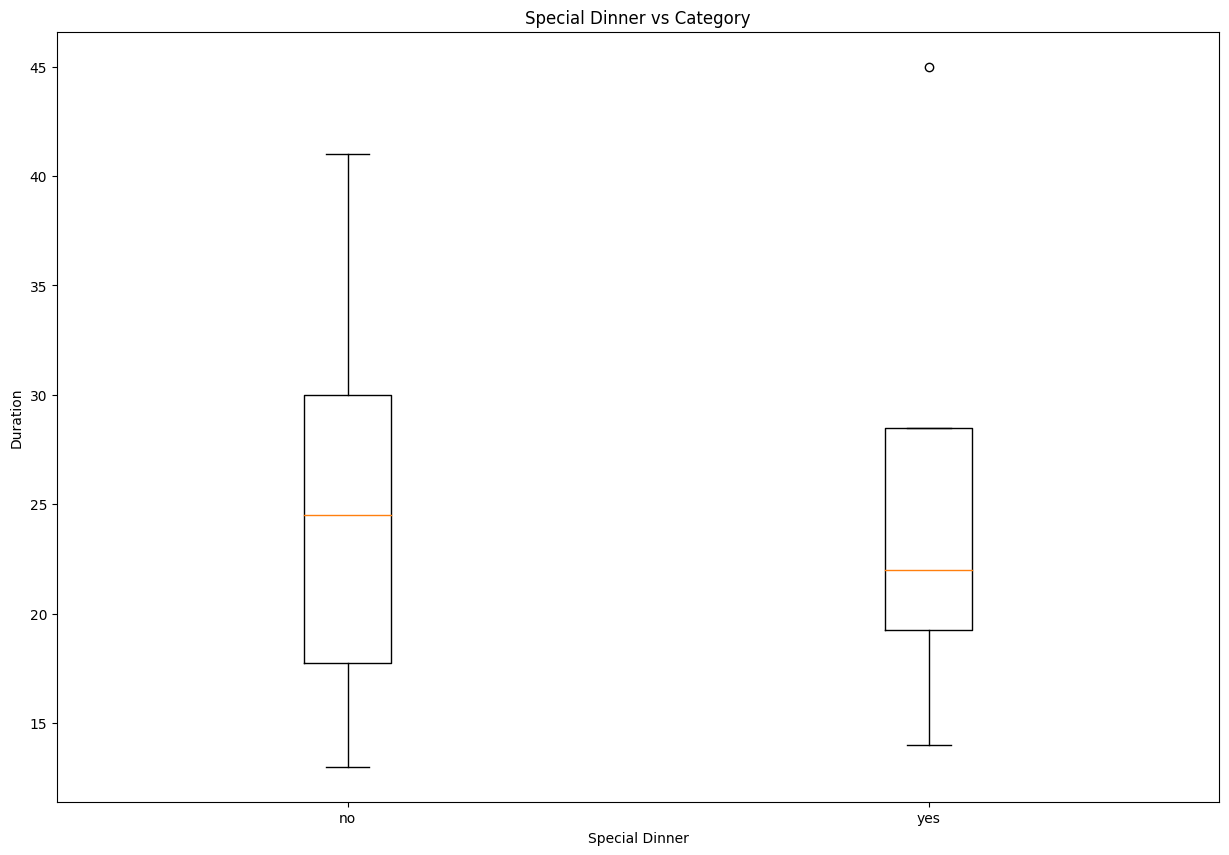

In [53]:
group_data=[data[data["Special_dinner"]==i].Duration.tolist() for i in data["Special_dinner"].drop_duplicates()]
plt.figure(figsize=(15,10))
plt.boxplot(group_data)
plt.xticks(range(1,3), data["Special_dinner"].drop_duplicates().tolist())
plt.xlabel("Special Dinner")
plt.ylabel("Duration")
plt.title("Special Dinner vs Category")

### Dropping Irrevalent Columns based on obeservation of above plots


In [54]:
pip install dython

In [55]:
from dython.nominal import identify_nominal_columns,associations

In [56]:
categorical_features=identify_nominal_columns(data)
categorical_features

['Day', 'Category', 'Start', 'Holiday', 'Special_dinner']

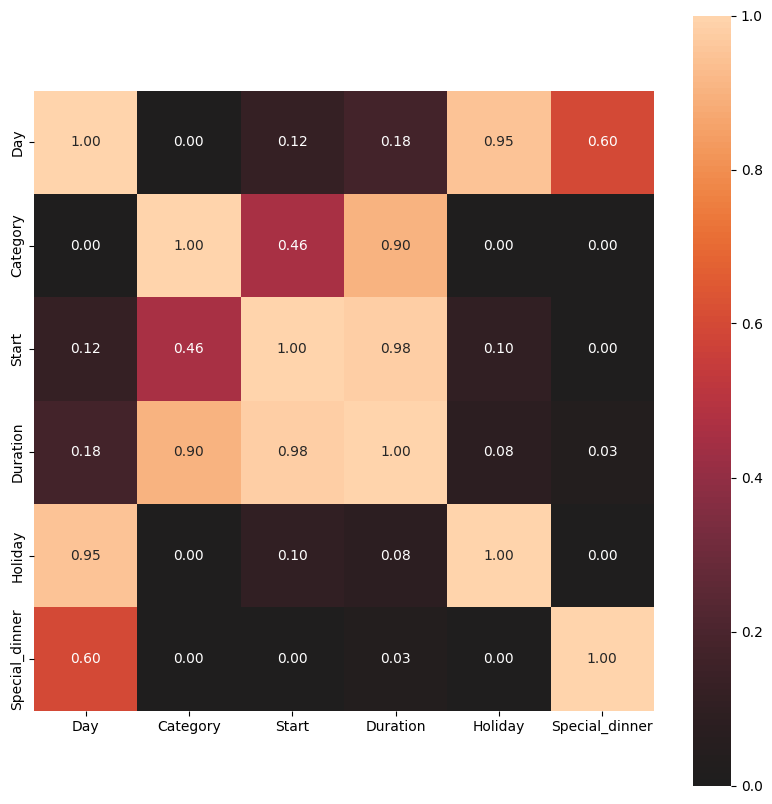

In [57]:
complete_correlation= associations(data, figsize=(10,10))

In [58]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

<ipython-input-58-0f00376ac5b1>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Day,Category,Start,Duration,Holiday,Special_dinner
Day,1.00,0.00,0.12,0.18,0.95,0.60
Category,0.00,1.00,0.46,0.90,0.00,0.00
Start,0.12,0.46,1.00,0.98,0.10,0.00
Duration,0.18,0.90,0.98,1.00,0.08,0.03
Holiday,0.95,0.00,0.10,0.08,1.00,0.00
Special_dinner,0.60,0.00,0.00,0.03,0.00,1.00


#### Analyzing Correlation Matrix

- As observed that the the feature 'Holiday' & 'Special_dinner' doesnot have a greater impact on the value of target variable. so we will drop those features from our data set
- The same can also be observed from both correlation matrix and box plot of the features `['Special_dinner','Holiday']` and `[Duration]`

In [59]:
data.drop(['Holiday','Special_dinner'],axis=1,inplace=True)
data.head()

,Day,Category,Start,Duration
0,Tuesday,Breakfast,08:20,19
1,Tuesday,Lunch,13:56,24
2,Tuesday,Tea,17:38,16
3,Tuesday,Dinner,19:57,25
4,Wednesday,Breakfast,08:32,21


# b) Building Model

### Importing Required Modules

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

### Numerical Encoding of Time

- Before feeding data to the model its important to convert time-series data to some numerical constants, so that it become compatible for mathematical calculations. This can be done in two ways:
    1. Numerical Encoding
    2. Cyclic Encoding
- Here we will use Numerical Encoding

In [61]:
data_ = data.copy()
data_['Start'] = data['Start'].apply(lambda x: int(x[:2]) + float(x[3:])/60)

### Train Test Split

In [62]:
X_train, X_test = train_test_split(data_,test_size=0.2,random_state=42)

X_train_start = np.array(X_train['Start'])
y_train_duration = np.array(X_train['Duration'].tolist())

### Training the Model

In [63]:
def polynomial_regression(X, y, degree): # python snippet to fit polynomial of degree 3 into numerical feature 'Start' and target vector

    X_poly = np.ones((X.shape[0], degree + 1))
    for d in range(1, degree + 1):
        X_poly[:, d] = X ** d
    coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    return coefficients

degree = 3
coefficients = polynomial_regression(X_train_start, y_train_duration, degree)

def train_model(data): # Evulate the category wise duration mean of Categorical Feature

    day_mean = {x: data[data["Day"]==x].Duration.mean() for x in data["Day"].drop_duplicates()}
    category_mean = {x: data[data["Category"]==x].Duration.mean() for x in data["Category"].drop_duplicates()}

    return {'Day':day_mean,'Category':category_mean}

data_trained = train_model(X_train)

## Testing the Model / Doing Predicting

In [64]:
def polynomial_regression_equation(x, coefficients): # predicts the duration on unseen start time

    result = coefficients[0]
    for i in range(1, len(coefficients)):
        result += coefficients[i] * (x ** i)

    return result

def test_model(data): # predicts the weighted mean of duration based on features value

    s=0
    predicted_values = np.zeros(data.shape[0])
    for index, row in data.iterrows():
        partial_prediction=0
        for column, value in row.items():

            if(column=='Start'):
                partial_prediction+=5*polynomial_regression_equation(int(value), coefficients) # weighted average of prediction for feature 'Start'
            elif(column=="Day"):
                partial_prediction+= 1*data_trained[column][value] # weighted average of mean for feature 'Day'
            else:
                partial_prediction+= 4*data_trained[column][value] # weighted average of mean for feature 'Category'

        predicted_values[s] = partial_prediction/(10)
        s=s+1

    return predicted_values

y_pred = np.floor(test_model(X_test.drop(['Duration'],axis=1)))
comparison = pd.DataFrame({'Actual':X_test.Duration,'Predicted':y_pred})
prediction_performance = r2_score(X_test.Duration,y_pred)
print(f"Model's Prediction Performance(R2 Score): {prediction_performance}")
comparison

Model's Prediction Performance(R2 Score): 0.9044425817267393


,Actual,Predicted
0,19,18.0
5,23,26.0
33,28,26.0
13,28,26.0
19,34,34.0
50,13,16.0
36,23,23.0
26,16,16.0
44,19,18.0
12,22,23.0


### Analyzing Parameters

- As observed from the correlation matrix and plots we can intuitively guess the order of importance of the parameter as Category>Start>Day. So the weights associated with each of them is 0.5, 0.4 & 0.1 respectively. Hence Category being the one having the highest dominance, interms of effect on target parameter

# C) Comparasion With Linear Regression

### Converting Categorical data to numerical

In [65]:
data_encoded = pd.get_dummies(data, columns=['Day','Category'])
data_encoded['Start'] = data_encoded['Start'].apply(lambda x: int(x[:2]) * 60 + int(x[3:]))
data_encoded

,Start,Duration,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Category_Breakfast,Category_Dinner,Category_Lunch,Category_Tea
0,500,19,0,0,0,0,0,1,0,1,0,0,0
1,836,24,0,0,0,0,0,1,0,0,0,1,0
2,1058,16,0,0,0,0,0,1,0,0,0,0,1
3,1197,25,0,0,0,0,0,1,0,0,1,0,0
4,512,21,0,0,0,0,0,0,1,1,0,0,0
5,835,23,0,0,0,0,0,0,1,0,0,1,0
6,1040,14,0,0,0,0,0,0,1,0,0,0,1
7,1210,45,0,0,0,0,0,0,1,0,1,0,0
8,570,19,0,0,0,0,1,0,0,1,0,0,0
9,786,20,0,0,0,0,1,0,0,0,0,1,0


###  Training the Model

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
X = data_encoded.drop(["Duration"],axis=1)
y = data_encoded['Duration']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train_1,y_train_1)


LinearRegression()

### Checking Model's Prediction Performation

In [68]:
model.score(X_train_1,y_train_1)

0.8907536178509623

In [69]:
model.score(X_test_1,y_test_1)

0.5510149182745314

### Testing the model

In [70]:
y_pred_1 = model.predict(X_test_1)
df = pd.DataFrame({'Actual':y_test_1,'Prediction':y_pred_1})
df

,Actual,Prediction
0,19,17.002306
5,23,31.430906
33,28,31.430906
13,28,28.102573
19,34,36.213493
50,13,17.067551
36,23,21.953642
26,16,16.579114
44,19,21.379595
12,22,22.056217


In [71]:
linear_model_r2=r2_score(y_test_1,y_pred_1)
linear_model_r2

0.5510149182745314

### Linear Regression vs Our trained Model (Evualtion Matric: R2 Square)

In [72]:
print("R2 Square Matric")
result = pd.DataFrame({'Linear Regression Performance' : linear_model_r2,'Our Model Performance' : prediction_performance},index=[1])
result

R2 Square Matric


,Linear Regression Performance,Our Model Performance
1,0.551015,0.904443
